In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

## 1. Image reading

*==============* First lab *==============*
Src Image:  data/lenna.png


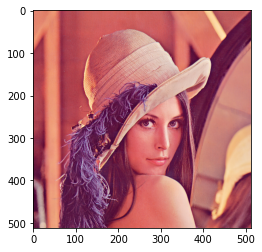

In [2]:
print("*==============* First lab *==============*")
path_to_img = "data/lenna.png"
print("Src Image: ", path_to_img)
img = cv2.imread(path_to_img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
# Shape
print("Shape: ", img.shape)
y, x, c = img.shape

Shape:  (512, 512, 3)


## 2. Face Detection

In [20]:
pass

## 3. Image cropping

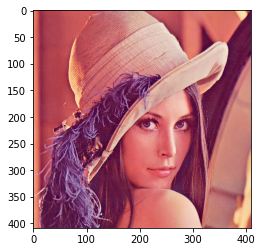

In [5]:
img = img[math.ceil(0.1 * y):math.ceil(0.9 * y), math.ceil(0.1 * x):math.ceil(0.9 * x), :]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 4. Edge Detector (Canny)

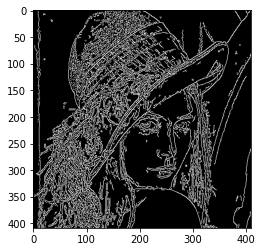

In [23]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray, 50, 100, 3);
plt.imshow(edges, cmap="gray")

## 5. Remove small contoures

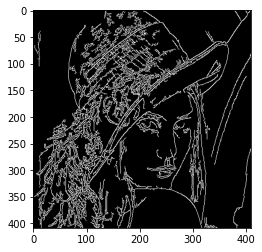

In [48]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
big_contoures = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if w >= 10 and h >= 10:
        big_contoures.append(c)
the_mask = np.zeros_like(edges)
cv2.drawContours(the_mask, big_contoures, -1, (255, 255, 255), cv2.FILLED)
edges = cv2.bitwise_and(edges, edges, mask = the_mask)
plt.imshow(edges, cmap="gray")

## 6 Dilation

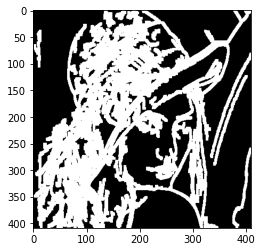

In [50]:
dilatation_size = 5
element = cv2.getStructuringElement(cv2.MORPH_RECT, (dilatation_size, dilatation_size))
dilatation = cv2.dilate(edges, element)
plt.imshow(dilatation, cmap="gray")

## 7 Gauss filter and normalization of image

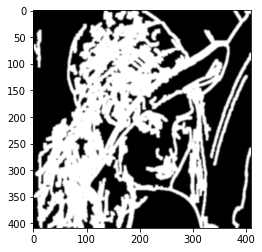

In [53]:
gauss_img = cv2.GaussianBlur(dilatation, (5, 5), 0)
plt.imshow(gauss_img, cmap="gray")

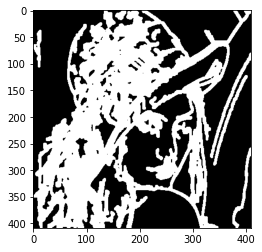

In [61]:
zeros_image = np.zeros_like(gauss_img)
m = cv2.normalize(gauss_img, zeros_image, 1, 0, cv2.NORM_INF)
plt.imshow(m, cmap="gray")

## 8. Bilaterial Filter - F1 image

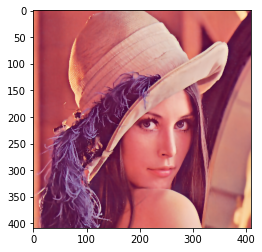

In [62]:
f1_img = cv2.bilateralFilter(img, 5, 80, 80) 
plt.imshow(cv2.cvtColor(f1_img, cv2.COLOR_BGR2RGB))

## 9. Clarity and contrast - F2 image

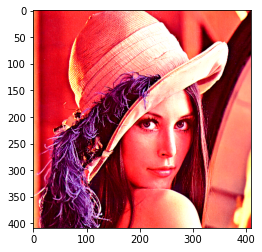

In [68]:
contrast = 2
brightness = -127
f2_img = cv2.addWeighted(img, contrast, img, 0, brightness)
plt.imshow(cv2.cvtColor(f2_img, cv2.COLOR_BGR2RGB))